In [ ]:
#previsão de preços futuro S&P500 e Bovespa

In [1]:
#importe das bibliotecas
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('S&P500.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,4732160000
1,2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,4023940000
2,2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3772630000
3,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
4,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
...,...,...,...,...,...,...,...
255,2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
256,2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
257,2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000
258,2021-12-30,4794.229980,4808.930176,4775.330078,4778.729980,4778.729980,2390990000


In [3]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-12-21,2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,4732160000
2020-12-22,2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,4023940000
2020-12-23,2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3772630000
2020-12-24,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
2021-12-28,2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
2021-12-29,2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000
2021-12-30,2021-12-30,4794.229980,4808.930176,4775.330078,4778.729980,4778.729980,2390990000


In [4]:
df1 = df.copy()

df1['Numbers'] = list(range(0,len(df1)))

X = np.array(df1[['Numbers']])
y = df1['Close'].values

lin_model = LinearRegression().fit(X,y)

print('Interceptar:' , lin_model.intercept_)
print('Declive:' , lin_model.coef_)

Interceptar: 3756.598178335337
Declive: [3.85813525]


Text(0.5, 1.0, 'Preço Hitorico Bovespa 2021')

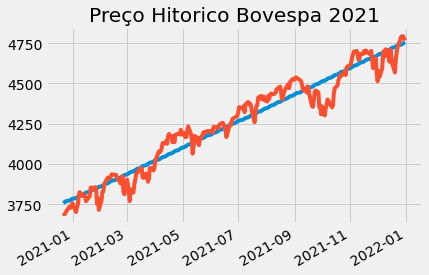

In [5]:
#y = mx + b
y_pred = lin_model.coef_ * X + lin_model.intercept_

df1['Pred'] = y_pred

df1['Pred'].plot()
df1['Close'].plot()
plt.title ('Preço Historico 2021')

In [6]:
r2_score(df1['Close'],df1['Pred'])

0.9415700552465799

In [7]:
lin_model.coef_ * len(df1)+1+ lin_model.intercept_

array([4760.71334296])